In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading data
data = pd.read_csv('insurance.csv')

# Displaying basic information
print(data.head())
print(data.info())
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

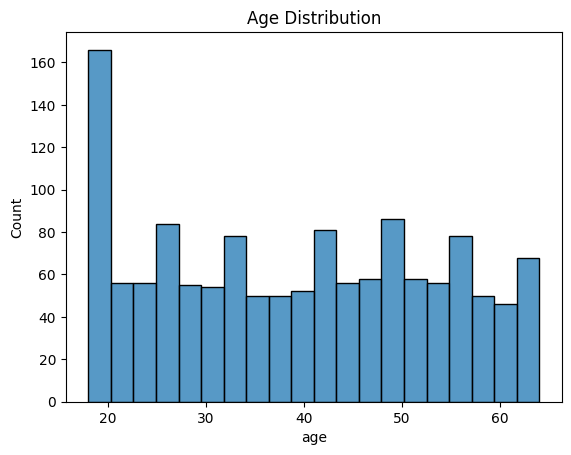

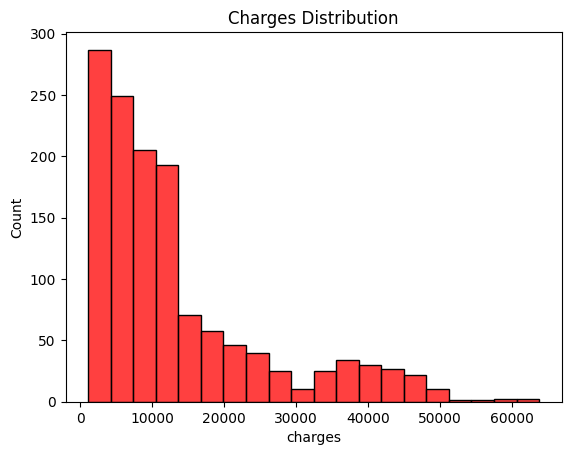

In [ ]:
sns.histplot(data['age'], bins=20)
plt.title("Age Distribution")
plt.show()

sns.histplot(data['charges'], bins=20, color='red')
plt.title("Charges Distribution")
plt.show()


Checking for missing values:

In [ ]:
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Converting sex, smoker, and region columns to numerical values:

In [ ]:
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data = pd.get_dummies(data, columns=['region'], drop_first=True)


**Splitting the dataset:**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Predicting medical costs, using a linear regression model:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 33596915.85136146
R^2 Score: 0.7835929767120723


**alternative method using RandomForestRegressor:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')


Random Forest MSE: 20955694.239791505
Random Forest R^2 Score: 0.8650185799366616


**Data Visualization:**

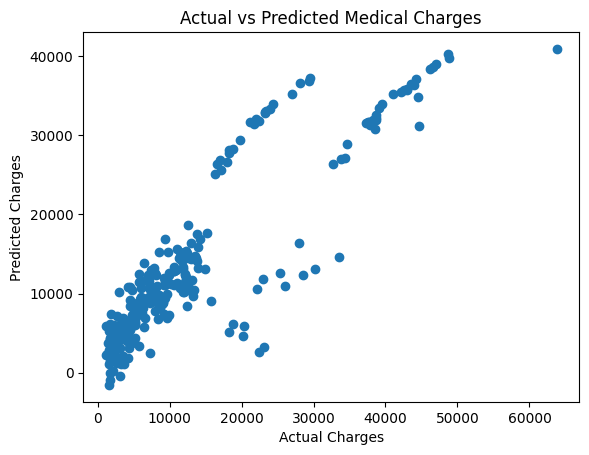

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()


**Feature importance:**

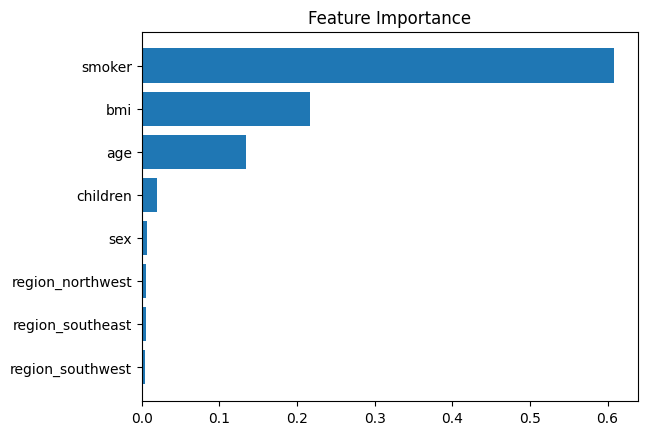

In [ ]:
importances = model_rf.feature_importances_
features = X.columns
sorted_indices = importances.argsort()

plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.title('Feature Importance')
plt.show()


In [ ]:
import joblib
joblib.dump(model_rf, 'patient_cost_predictor.pkl')


['patient_cost_predictor.pkl']